In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("tinder_google_play_reviews.csv")
print(data.head())

                               reviewId             userName  \
0  000e30fe-60df-4de3-b990-ae828b6da069      Milo de la Pena   
1  0a80fb04-faad-427e-814d-8244a1f86d48  Mike Angelo Miranda   
2  2f5e9934-119d-4dff-bb2f-5c64bb94eb39       Michael Binnig   
3  337aabbc-ec12-4aaa-ada3-1e40b77063a5         Am3r1k1lla !   
4  eba92454-5aa0-4863-98d5-e98d1d8dec2d                K Big   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  The way this app practically demands you pay i...      1              0   
1  Updating since watching ads isnnow working. Bu...      4              0   
2  Made a new account on Tinder, then get pe

#On the first impressions of this dataset, I can see some null values in some columns. To analyze the Tinder reviews, we only need the content column. So let’s create a new dataset with the content column and move further:

In [7]:
data = data[["content"]]

In [9]:
#Now let’s see if we have null values in the content column:


In [10]:
data.isnull().sum()

content    1358
dtype: int64

The content column also contains null values, let’s remove the null values and move on:



In [12]:
data = data.dropna()

let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column:

In [14]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/niyasop/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

Now let’s have a look at the kind of words people use in the reviews of Tinder:

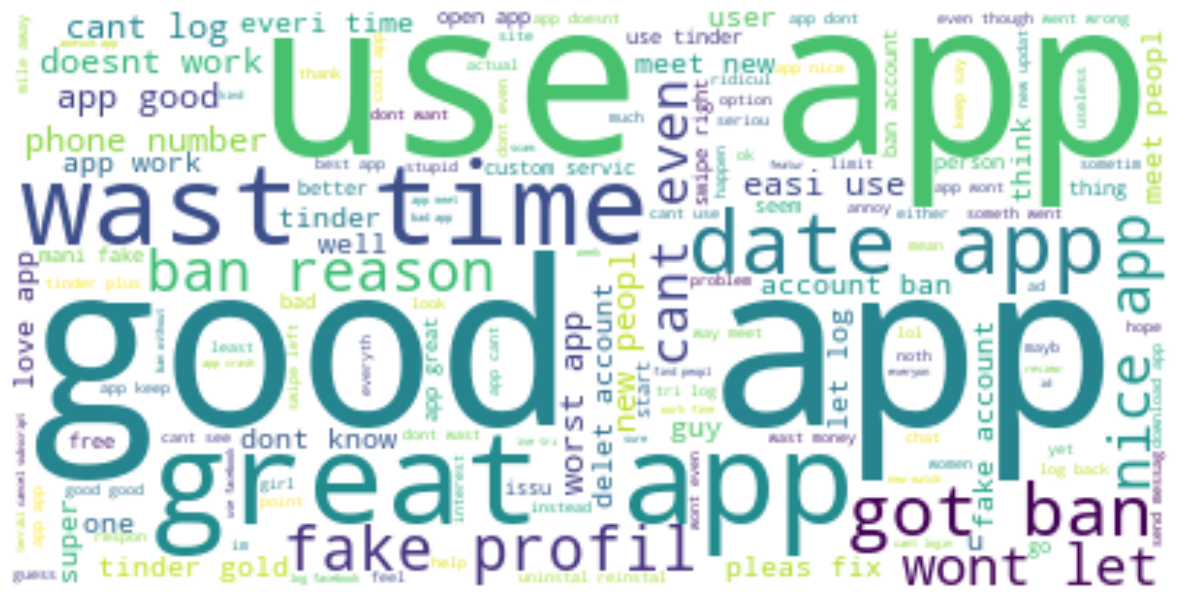

In [16]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:

In [18]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/niyasop/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0  way app practic demand pay money pretti much a...     0.247     0.127   
1  updat sinc watch ad isnnow work add featur see...     0.161     0.000   
2  made new account tinder get perman ban noth ti...     0.000     0.310   
3                tinder wont even load cant open app     0.000     0.000   
4  recent ban nowher warn whatsoev im person know...     0.069     0.273   

   Neutral  
0    0.626  
1    0.839  
2    0.690  
3    1.000  
4    0.658  



Now let’s have a look at the kind of words people use in the positive reviews of Tinder:

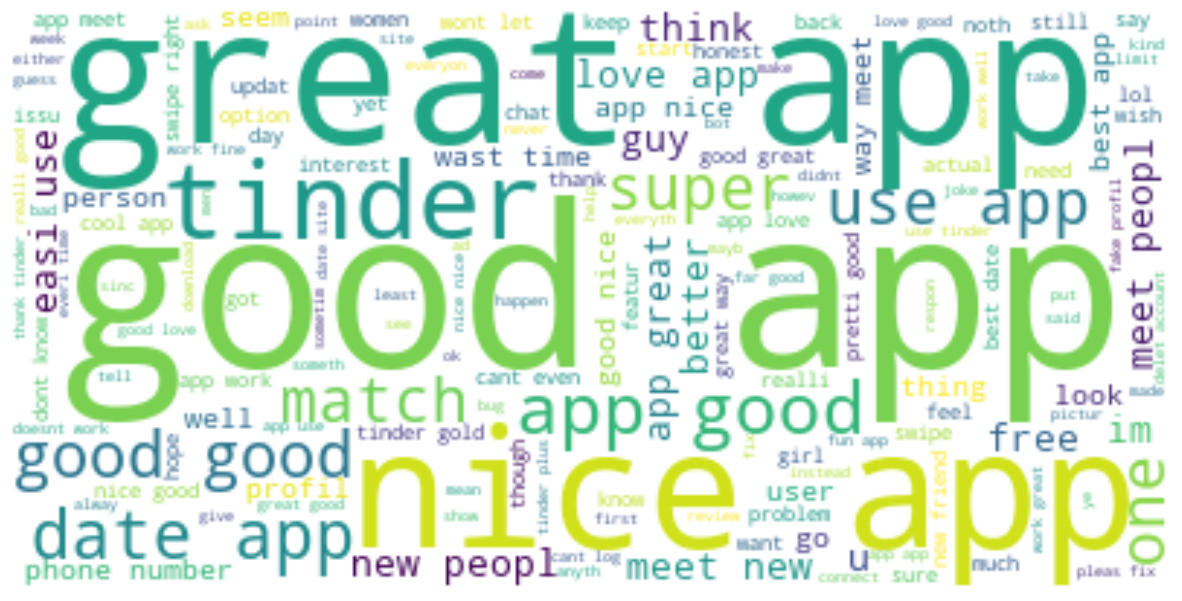

In [19]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the kind of words people use in the negative reviews of Tinder:

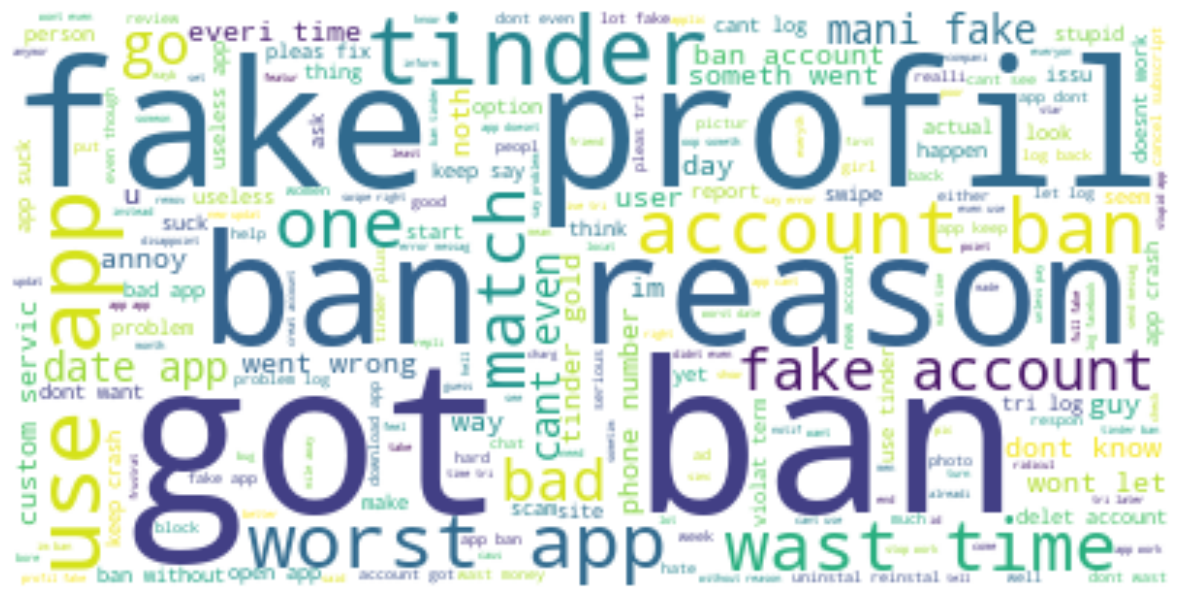

In [20]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let’s have a look at the overall sentiment score of the users of Tinder:



In [21]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So most of the users write reviews neutrally. Let’s have a look at the total of all the sentiment scores:



In [22]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  175817.88100002523
Negative:  70935.09499999712
Neutral:  354534.9899999435


As you can see, the positive is much more than the negative, we can say that most users are happy with Tinder.